<h1>Model Evaluation and Refinement</h1>

<p>Checking Accuracy of Predictions</p>

In [1]:
import pandas as pd
import numpy as np

# Import clean data 
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/module_5_auto.csv'
df = pd.read_csv(path)

In [2]:
df.to_csv('module_5_auto.csv')

In [3]:
df = df._get_numeric_data()
df.head()

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


In [4]:
from IPython.display import display
from IPython.html import widgets
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual

C:\Users\shubh\AppData\Local\Programs\Python\Python38\lib\site-packages\IPython\html.py:12: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  warn("The `IPython.html` package has been deprecated since IPython 4.0. "


<h2>Functions for plotting</h2>

In [5]:
def DistributionPlot(Redfunction,Bluefunction,RedName,BlueName,Title):
    width = 12
    height = 10
    plt.figure(figsize=(width,height))
    
    ax1  = sns.distplot(Redfunction, hist=False, color="r", label=RedName)
    ax2  = sns.distplot(Bluefunction, hist=False, color="b", label=BlueName, ax=ax1)
    
    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')
    
    plt.show()
    plt.close()
    

In [6]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

<h1 id="ref1">Training and Testing</h1>

Spliting data into training and testing data. 
Placing the target data price in a separate dataframe 

In [7]:
y_data = df['price']

In [8]:
x_data=df.drop('price',axis=1)

In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=1)

print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])


number of test samples : 31
number of training samples: 170


In [10]:
from sklearn.linear_model import LinearRegression
lre=LinearRegression()
lre.fit(x_train[['horsepower']], y_train)

LinearRegression()

R^2 value:

In [11]:
lre.score(x_test[['horsepower']], y_test)

0.707688374146705

In [12]:
lre.score(x_train[['horsepower']], y_train)

0.6449517437659684

<h2>Cross-validation Score</h2>

In [13]:
from sklearn.model_selection import cross_val_score

In [14]:
Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=4)

In [15]:
Rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

 We can calculate the average and standard deviation of our estimate:

In [16]:
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.522009915042119 and the standard deviation is 0.2911839444756029


We can use negative squared error as a score by setting the parameter  'scoring' metric to 'neg_mean_squared_error'. 

In [17]:
-1 * cross_val_score(lre, x_data[['horsepower']], y_data, cv=4, scoring = 'neg_mean_squared_error')

array([20254142.84026702, 43745493.2650517 , 12539630.34014931,
       17561927.7224759 ])

Lets Calculate the average R^2 using two folds and find the average R^2 for the second fold utilizing the horsepower as a feature : 

In [18]:
Rcross1 = cross_val_score(lre,x_data[['horsepower']],y_data,cv=2)
Rcross1

array([0.59015621, 0.44319613])

In [19]:
from sklearn.model_selection import cross_val_predict

We input the object, the feature in this case <b>'horsepower'</b> , the target data <b>y_data</b>. The parameter 'cv' determines the number of folds; in this case 4. We can produce an output:

In [20]:
yhat = cross_val_predict(lre,x_data[['horsepower']], y_data,cv=4)
yhat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

<h1 id="ref2">Overfitting, Underfitting and Model Selection</h1>


Creating Multiple linear regression objects and train the model using 'horsepower', 'curb-weight', 'engine-size' and 'highway-mpg'as features.

In [21]:
lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

LinearRegression()

In [22]:
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]

array([11927.70699817, 11236.71672034,  6436.91775515, 21890.22064982,
       16667.18254832])

In [23]:
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([11349.16502418,  5914.48335385, 11243.76325987,  6662.03197043,
       15555.76936275])

Model evaluation using our training and testing data separately.

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

C:\Users\shubh\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\shubh\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


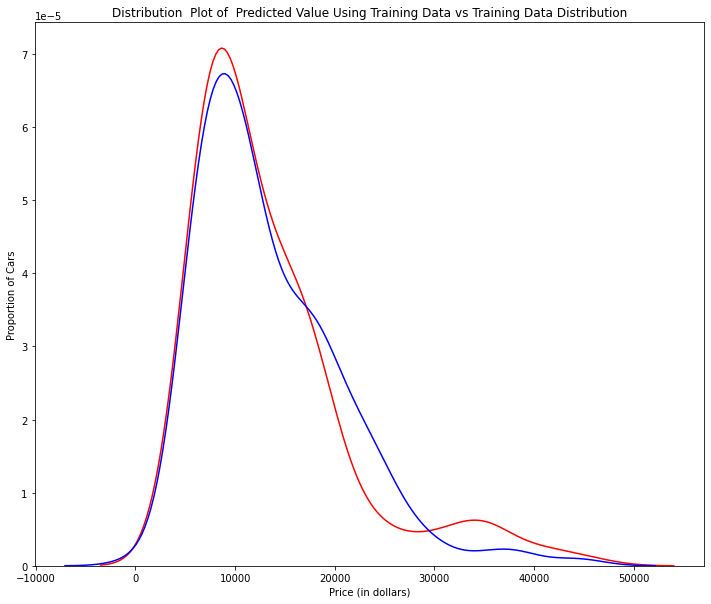

In [25]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

Figure 1 : Plot of predicted values using the training data compared to the training data. 

 When the model generates new values from the test data, the distribution of the predicted values is much different from the actual target values. 

C:\Users\shubh\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\shubh\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


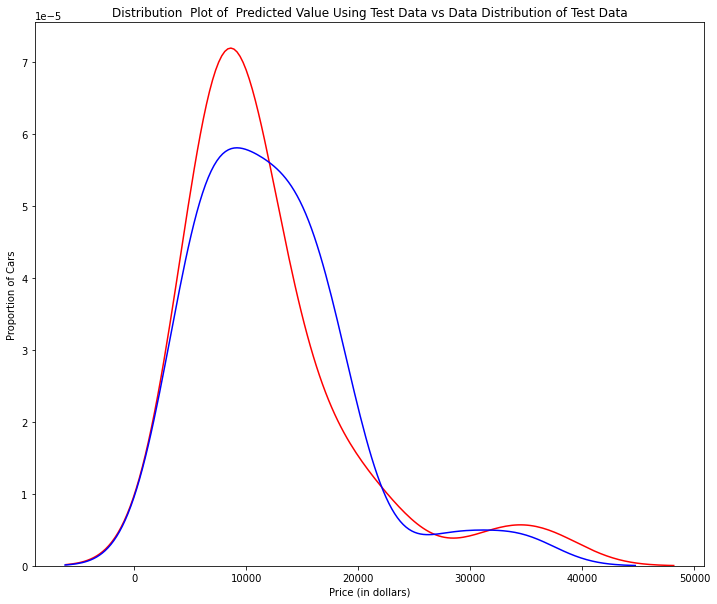

In [26]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

Figure 2 : Plot of predicted value using the test data compared to the test data. 

<p>It is evident the distribution of the test data in Figure 1 is much better at fitting the data. This difference in Figure 2 is apparent where the ranges are from 5000 to 15 000. This is where the distribution shape is exceptionally different.</p>
<p>Checking if polynomial regression also exhibits a drop in the prediction accuracy when analysing the test dataset.</p>

In [27]:
from sklearn.preprocessing import PolynomialFeatures

<h4>Overfitting</h4>
<p>Overfitting occurs when the model fits the noise, not the underlying process. Therefore when testing model using the test-set, model does not perform as well as it is modelling noise, not the underlying process that generated the relationship. 
Creating a degree 5 polynomial model.</p>

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

In [29]:
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5)

Creating a linear regression model "poly" and train it.

In [30]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression()

In [31]:
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([ 6728.65566037,  7307.9878638 , 12213.7877412 , 18893.24796457,
       19995.95185894])

In [32]:
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [ 6728.65566037  7307.9878638  12213.7877412  18893.24796457]
True values: [ 6295. 10698. 13860. 13499.]


Display the training data, testing data, and the predicted function.

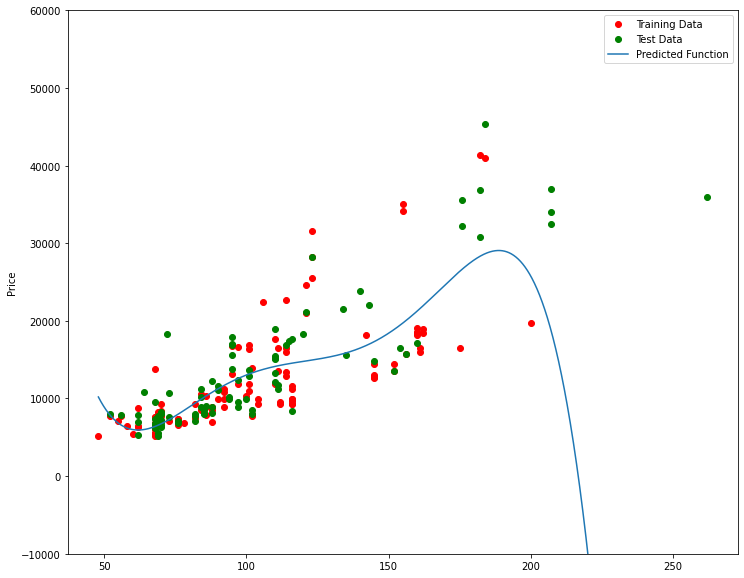

In [33]:
PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly,pr)

We see that the estimated function appears to track the data but around 200 horsepower, the function begins to diverge from the data points. 

 R^2 value:

In [34]:
poly.score(x_train_pr, y_train)

0.5567716902121727

In [35]:
poly.score(x_test_pr, y_test)

-29.871340540625223

We see the R^2 for the training data is 0.5567 while the R^2 on the test data was -29.87.  The lower the R^2, the worse the model, a Negative R^2 is a sign of overfitting.

Checking R^2 changes on the test data for different order polynomials and plot the results:

Text(3.2, 0.73, 'Maximum R^2')

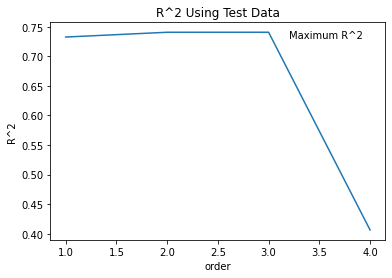

In [36]:
Rsqu_test = []
order = [1,2,3,4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    
    lr.fit(x_train_pr,y_train)
    Rsqu_test.append(lr.score(x_test_pr,y_test))
    
plt.plot(order,Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3.2,0.73,'Maximum R^2')
 

In [37]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data,y_data,test_size=test_data,random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train,y_test, poly, pr)

In [38]:
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

<h2 id="ref3">Ridge regression</h2> 

We will see how the parameter Alfa changes the model(Our test data will be used as validation data)

In [39]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

In [40]:
from sklearn.linear_model import Ridge

In [41]:
RigeModel=Ridge(alpha=0.1)

In [42]:
RigeModel.fit(x_train_pr, y_train)

C:\Users\shubh\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.02972e-16): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Ridge(alpha=0.1)

In [43]:
yhat = RigeModel.predict(x_test_pr)

Comparing the first five predicted samples to our test set 

In [44]:
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [ 6567.83081933  9597.97151399 20836.22326843 19347.69543463]
test set : [ 6295. 10698. 13860. 13499.]


Selecting the value of Alfa that minimizes the test error

In [45]:
Rsqu_test = []
Rsqu_train = []
dummy1 = []
ALFA = 10 * np.array(range(0,1000))
for alfa in ALFA:
    RigeModel = Ridge(alpha=alfa) 
    RigeModel.fit(x_train_pr, y_train)
    Rsqu_test.append(RigeModel.score(x_test_pr, y_test))
    Rsqu_train.append(RigeModel.score(x_train_pr, y_train))

Ploting out the value of R^2 for different Alphas 

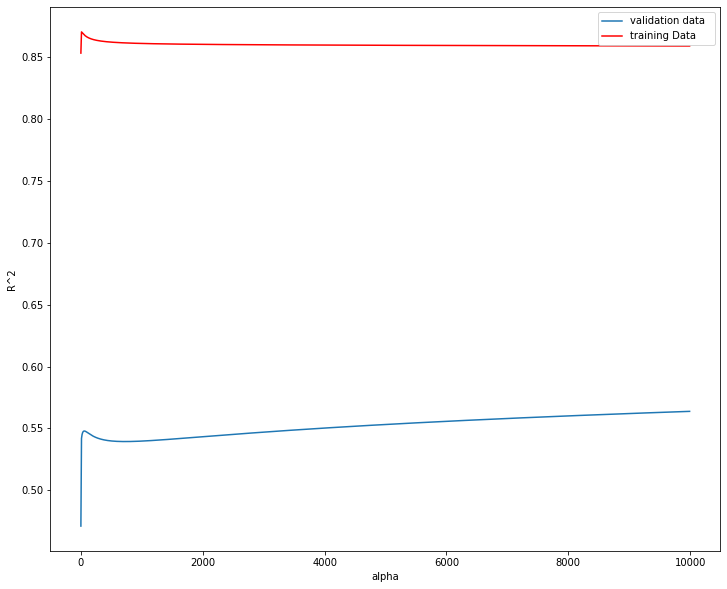

In [46]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(ALFA,Rsqu_test, label='validation data  ')
plt.plot(ALFA,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()
plt.show()

Figure 6 :The blue line represents the R^2 of the test data, and the red line represents the R^2 of the training data. The x-axis represents the different values of Alfa 

The red line in figure 6 represents the  R^2 of the test data, as Alpha increases the R^2 decreases; therefore as Alfa increases the model performs worse on the test data.  The blue line represents the R^2 on the validation data, as the value for Alfa increases the R^2 decreases.   

<h2 id="ref4">Grid Search</h2>

The term Alfa is a hyperparameter, sklearn has the class  <b>GridSearchCV</b> to make the process of finding the best hyperparameter simpler.

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

Create a ridge regions object:

In [49]:
RR=Ridge()
RR

Ridge()

Create a ridge grid search object 

In [50]:
Grid1 = GridSearchCV(RR, parameters1,cv=4)

Fit the model 

In [51]:
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

The object finds the best parameter values on the validation data. We can obtain the estimator with the best parameters and assign it to the variable BestRR as follows:

In [52]:
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=10000)

testing model on the test data 

In [53]:
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.8411649831036152

Performing a grid search for the alpha parameter and the normalization parameter, then find the best values of the parameters
</div>

In [55]:
parameters2= [{'alpha': [0.001,0.1,1, 10, 100, 1000,10000,100000,100000],'normalize':[True,False]} ]
Grid2 = GridSearchCV(Ridge(), parameters2,cv=4)
Grid2.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']],y_data)
Grid2.best_estimator_

Ridge(alpha=0.1, normalize=True)